In [1]:
import pandas as pd
import numpy as np
titanic_ds=pd.read_csv("train.csv")

#### As the missing percentage of data is very high for Variable 'Cabin',so we are creating a flag variable for this Categorical variable.

In [2]:
titanic_ds['is_Cabin']=np.where(titanic_ds['Cabin'].isnull(),0,1)

In [3]:
titanic_ds[['Cabin','is_Cabin']]

,Cabin,is_Cabin
0,NaN,0
1,C85,1
2,NaN,0
3,C123,1
4,NaN,0
5,NaN,0
6,E46,1
7,NaN,0
8,NaN,0
9,NaN,0


#### As the data for variable 'Age' is positively skewed,so we are replacing missing values with Median.

In [4]:
titanic_ds['Age'].median()

28.0

In [5]:
titanic_ds['Age']=titanic_ds['Age'].fillna(titanic_ds['Age'].median())

In [6]:
titanic_ds['Age'].isnull().sum()

0

#### As only two values are missing for 'Embarked' variable,so we are imputing with Category with similar response.

In [7]:
pd.crosstab(titanic_ds['Embarked'],titanic_ds['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [8]:
titanic_ds[titanic_ds['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [9]:
titanic_ds['Embarked']=titanic_ds['Embarked'].fillna('C')

In [10]:
titanic_ds['Embarked'].isnull().sum()

0

# Outlier Detection

In [11]:
titanic_ds.Age.quantile(0.05)

6.0

In [12]:
titanic_ds.Age.quantile(0.95)

54.0

In [13]:
titanic_ds.Age.quantile(0.02)

2.0

In [14]:
titanic_ds.Age.quantile(0.98)

62.0

In [15]:
titanic_ds['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
titanic_ds['Age'].hist()

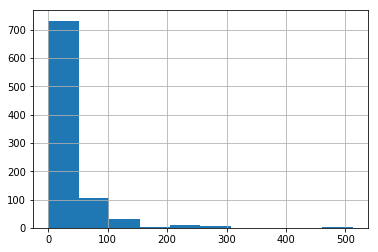

In [17]:
titanic_ds['Fare'].hist()

In [18]:
titanic_ds['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
titanic_ds.Fare.quantile(0.02)

6.397500000000001

In [20]:
titanic_ds.Fare.quantile(0.05)

7.225

In [21]:
titanic_ds.Fare.quantile(0.95)

112.07915

In [22]:
titanic_ds.Fare.quantile(0.98)

211.33750000000003

# Winsorization Technique

#### As value for variable 'Age' and 'Fare' have outliers with high value and low frequency,so we are removing by capping at 98 percentile.

In [23]:
titanic_ds['Age']=np.where(titanic_ds['Age']>titanic_ds.Age.quantile(0.98),titanic_ds.Age.quantile(0.98),titanic_ds['Age'])

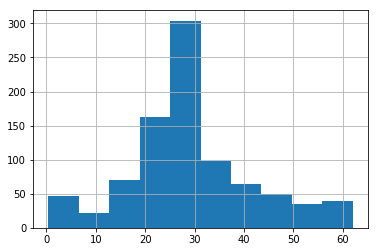

In [24]:
titanic_ds['Age'].hist()

In [25]:
titanic_ds['Fare']=np.where(titanic_ds['Fare']>titanic_ds.Fare.quantile(0.98),titanic_ds.Fare.quantile(0.98),titanic_ds['Fare'])

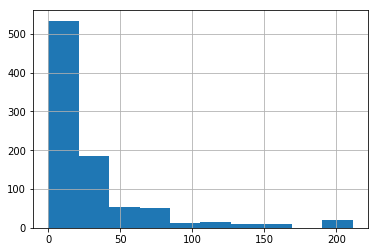

In [26]:
titanic_ds['Fare'].hist()

In [39]:
tit_sur=titanic_ds[titanic_ds["Survived"]==1]
tit_nsur=titanic_ds[titanic_ds["Survived"]!=1]

In [40]:
tit_sur['Age'].describe()

count    342.000000
mean      28.232953
std       13.584766
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       62.000000
Name: Age, dtype: float64

In [41]:
tit_nsur['Age'].describe()

count    549.000000
mean      29.897996
std       12.119108
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       62.000000
Name: Age, dtype: float64

In [43]:
tit_sur['Fare'].describe()

count    342.00000
mean      44.90675
std       49.48346
min        0.00000
25%       12.47500
50%       26.00000
75%       57.00000
max      211.33750
Name: Fare, dtype: float64

In [44]:
tit_nsur['Fare'].describe()

count    549.000000
mean      21.814972
std       29.282700
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      211.337500
Name: Fare, dtype: float64

# Survival Rate Checking

#### Categories with same survival rate will be merged together

In [27]:
pd.crosstab(titanic_ds['Embarked'],titanic_ds['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,95,170
Q,47,30,77
S,427,217,644
All,549,342,891


In [28]:
pd.crosstab(titanic_ds['Embarked'],titanic_ds['Survived']).apply(lambda r:r/r.sum()*100,axis=1)

Survived,0,1
Embarked,,
C,44.117647,55.882353
Q,61.038961,38.961039
S,66.304348,33.695652


In [29]:
pd.crosstab(titanic_ds['Pclass'],titanic_ds['Survived']).apply(lambda r:r/r.sum()*100,axis=1)

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [30]:
pd.crosstab(titanic_ds['Sex'],titanic_ds['Survived']).apply(lambda r:r/r.sum()*100,axis=1)

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [31]:
pd.crosstab(titanic_ds['SibSp'],titanic_ds['Survived']).apply(lambda r:r/r.sum()*100,axis=1)

Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000


In [32]:
pd.crosstab(titanic_ds['Parch'],titanic_ds['Survived']).apply(lambda r:r/r.sum()*100,axis=1)

Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000


### No categories merged as survival rate for all categories was differing a lot.

# Category Merge

### Categories with few records will be merged togethar

In [33]:
titanic_ds['SibSp']=np.where(titanic_ds.SibSp.isin([2,3,4,5,8]),2,titanic_ds['SibSp'])

In [34]:
titanic_ds['SibSp'].value_counts()

0    608
1    209
2     74
Name: SibSp, dtype: int64

In [35]:
titanic_ds['Parch']=np.where(titanic_ds.Parch.isin([2,3,4,5,6]),2,titanic_ds['Parch'])

In [36]:
titanic_ds['Parch'].value_counts()

0    678
1    118
2     95
Name: Parch, dtype: int64